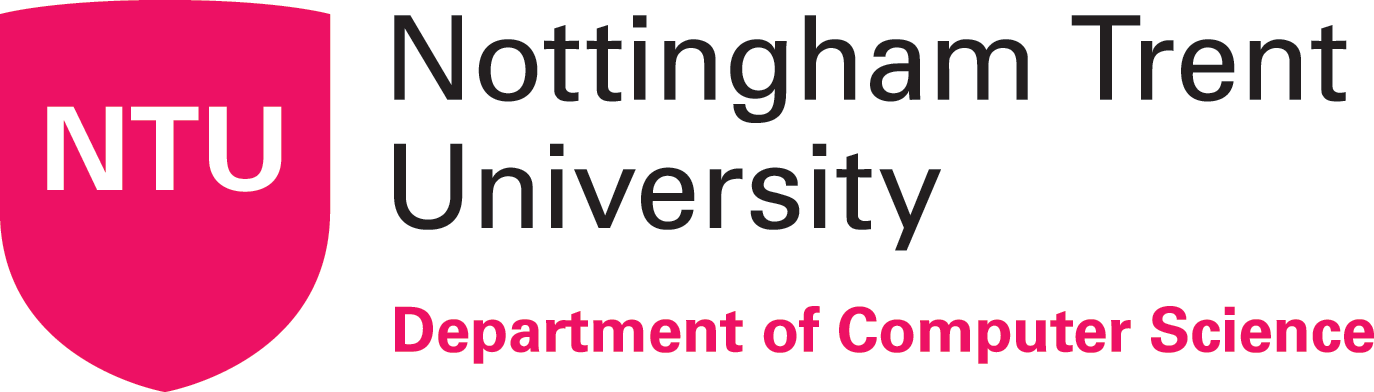

# SOFT40161 - Introduction to Computer Programming: Lab 10

<font  color= 'red'> **Note: This lab is for demonstration purpose as a part of tranferable skills for other modules. We shoued here how can we use our Python programming language concepts for ML.** </font>

## Python for Machine Learning: 
EDA and Working with Real-World Dat.


Please visit the lecture materials first!

## Lab Learning Outcomes

By the end of this lecture, students will:
1. Remember: Define Data Science, ML, AI, Big Data, and the steps of the Data Science.
2. Understand: Domain overlaps and the role of EDA in ML workflows.
3. Apply: Use Python to perform basic EDA and implement example ML models.
4. Analyse: Introduce ML algorithm types and analyse datasets for patterns.
5. Evaluate: Assess the suitability of ML algorithms for real-world problems.
6. Create: Develop a pipeline for data processing, EDA, and ML modelling.



https://www.geeksforgeeks.org/machine-learning-projects/


# Example, Explanation and Exercise

## Example 01: Linear Regression Example

The example below uses only the first feature of the diabetes dataset, in order to illustrate the data points within the two-dimensional plot. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The coefficients, residual sum of squares and the coefficient of determination are also calculated.

Matplotlib is building the font cache; this may take a moment.


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


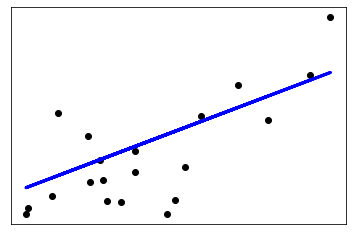

In [1]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [[603.78629491]]
Mean squared error: 11372.13
Coefficient of determination: 0.53


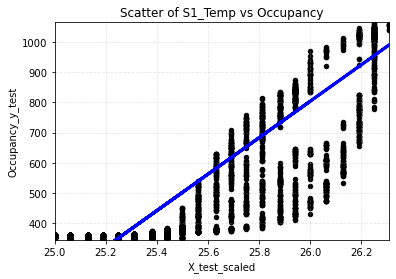

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import pandas as pd

# Load the coursework dataset
df = pd.read_csv("Occupancy_Estimation.csv")

df.head(10)

S1_Temp_X = df.iloc[:,[2]]
Room_Occupancy_Y = df.iloc[:,[14]]

#print(S1_Temp_X)
#print(Room_Occupancy_Y)

# Split the data into training/testing sets
#S1_Temp_X_train 
X_train_scaled = S1_Temp_X[:-8000]
#S1_Temp_X_test 
X_test_scaled = S1_Temp_X[-8000:]

# Split the targets into training/testing sets
Occupancy_y_train = Room_Occupancy_Y[:-8000]
Occupancy_y_test = Room_Occupancy_Y[-8000:]

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(S1_Temp_X_train)
#X_test_scaled  = scaler.transform(S1_Temp_X_test)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_scaled, Occupancy_y_train)

# Make predictions using the testing set
Occupancy_y_pred = regr.predict(X_test_scaled)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Occupancy_y_test, Occupancy_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Occupancy_y_test, Occupancy_y_pred))

# Plot outputs

x = np.ravel(X_test_scaled)      
y = np.ravel(Occupancy_y_test)

xmin, xmax = np.min(x), np.max(x)
ymin, ymax = np.min(y), np.max(y)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color="black", s=20)
plt.xlabel("X_test_scaled")
plt.ylabel("Occupancy_y_test")
plt.title("Scatter of S1_Temp vs Occupancy")

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.grid(True, linestyle="--", alpha=0.3)

plt.plot(X_test_scaled, Occupancy_y_pred, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()


Coefficients: 
 [[0.00073287]]
Mean squared error: 4518.94
Coefficient of determination: -0.71


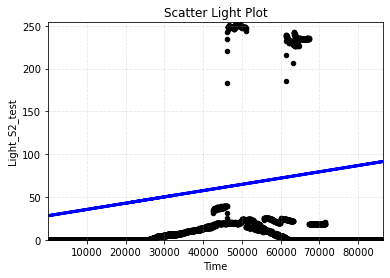

In [27]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import pandas as pd

# Load the coursework dataset
df = pd.read_csv("Occupancy_Estimation.csv")

df.head(10)

S1_Temp_X = pd.to_datetime(df.iloc[:,1], format = '%H:%M:%S', errors = 'coerce')

S1_Temp_seconds = (
    S1_Temp_X.dt.hour * 3600 +
    S1_Temp_X.dt.minute * 60 +
    S1_Temp_X.dt.second
).astype(float)

# As a 2D input for scikit-learn
S1_Temp_X = S1_Temp_seconds.to_numpy().reshape(-1, 1)

# Target column (kept as (n,1) DataFrame or convert similarly)
Room_Occupancy_Y = df.iloc[:, [7]]

#print(S1_Temp_X)
#print(Room_Occupancy_Y)

# Split the data into training/testing sets
#S1_Temp_X_train 
X_train_scaled = S1_Temp_X[:-8000]
#S1_Temp_X_test 
X_test_scaled = S1_Temp_X[-8000:]

# Split the targets into training/testing sets
Occupancy_y_train = Room_Occupancy_Y[:-8000]
Occupancy_y_test = Room_Occupancy_Y[-8000:]

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(S1_Temp_X_train)
#X_test_scaled  = scaler.transform(S1_Temp_X_test)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_scaled, Occupancy_y_train)

# Make predictions using the testing set
Occupancy_y_pred = regr.predict(X_test_scaled)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Occupancy_y_test, Occupancy_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Occupancy_y_test, Occupancy_y_pred))

# Plot outputs

x = np.ravel(X_test_scaled)      
y = np.ravel(Occupancy_y_test)

xmin, xmax = np.min(x), np.max(x)
ymin, ymax = np.min(y), np.max(y)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color="black", s=20)
plt.xlabel("Time")
plt.ylabel("Light_S2_test")
plt.title("Scatter Light Plot")

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.grid(True, linestyle="--", alpha=0.3)

plt.plot(X_test_scaled, Occupancy_y_pred, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()


## Example 02: Ordinary Least Squares and Ridge Regression Variance

Due to the few points in each dimension and the straight line that linear regression uses to follow these points as well as it can, noise on the observations will cause great variance as shown in the first plot. Every line’s slope can vary quite a bit for each prediction due to the noise induced in the observations.

Ridge regression is basically minimizing a penalised version of the least-squared function. The penalising shrinks the value of the regression coefficients. Despite the few data points in each dimension, the slope of the prediction is much more stable and the variance in the line itself is greatly reduced, in comparison to that of the standard linear regression

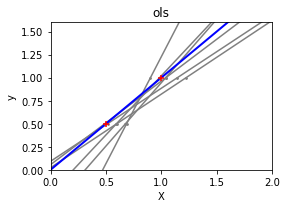

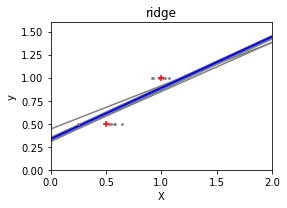

In [2]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()

**Output:**
A window titled "Label Example" with:
- A blue-colored text label that says "Welcome to Tkinter!".
> The label has a light blue background, dark blue text, padding, and a raised border style.
- You can customize the text, colors, and font to suit your needs!

## Example 03: Gaussian process classification (GPC) on iris dataset

This example illustrates the predicted probability of GPC for an isotropic and anisotropic RBF kernel on a two-dimensional version for the iris-dataset. The anisotropic RBF kernel obtains slightly higher log-marginal-likelihood by assigning different length-scales to the two feature dimensions.

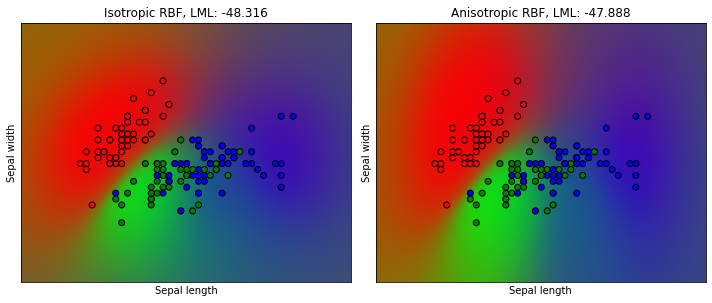

In [3]:
# https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpc_iris.html#sphx-glr-auto-examples-gaussian-process-plot-gpc-iris-py

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)

h = 0.02  # step size in the mesh

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y], edgecolors=(0, 0, 0))
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(
        "%s, LML: %.3f" % (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta))
    )

plt.tight_layout()
plt.show()

## Example 04: Classifier comparison

A comparison of several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

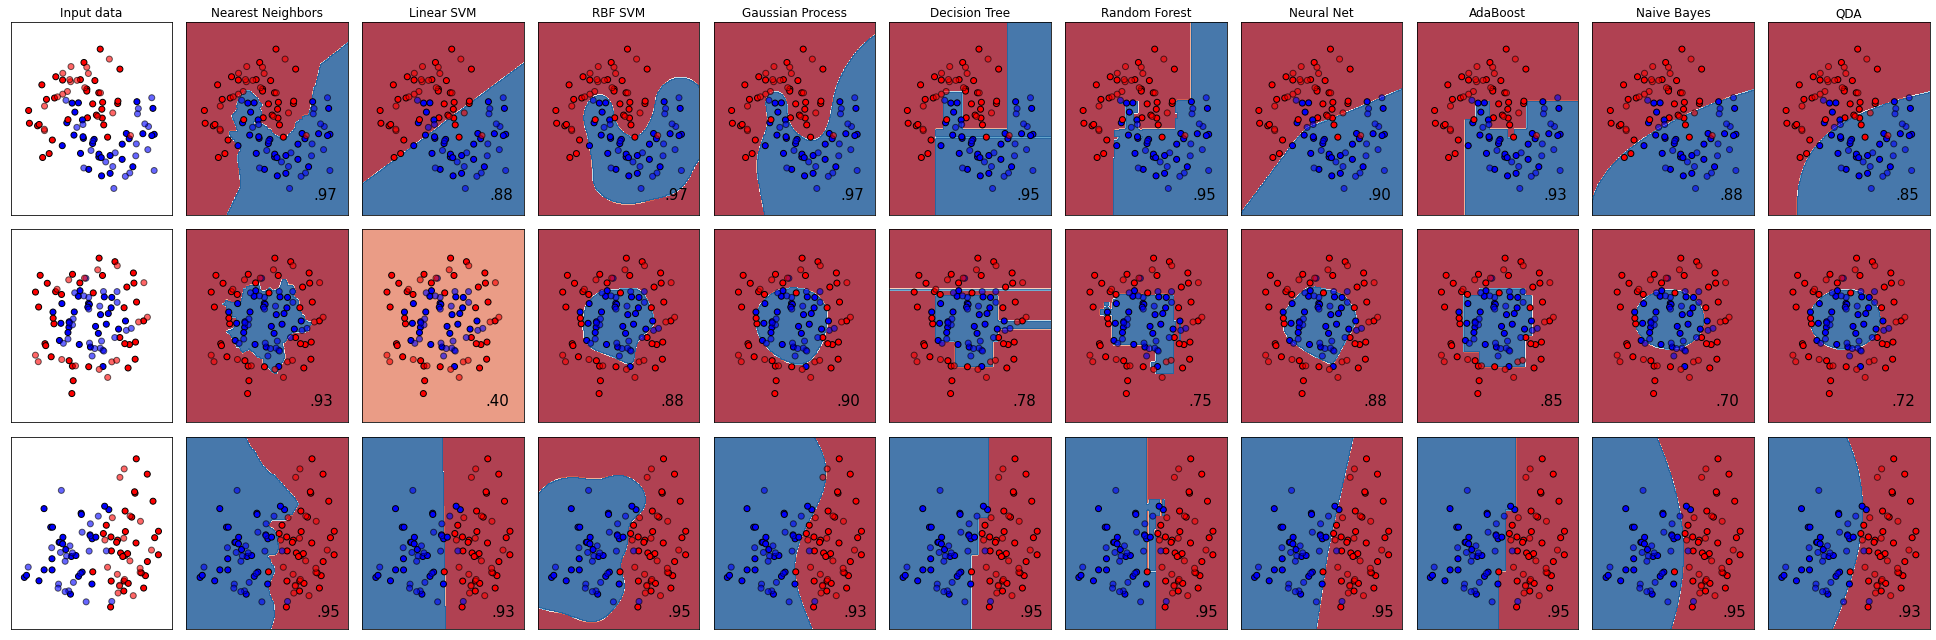

In [4]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

# Modified to work with older versions (0.x) of sklearn library (sklearn.inspection.DecisionBoundaryDisplay fix)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


def plot_decision_boundary(clf, X, ax, cmap, x_min, x_max, y_min, y_max, eps=0.5, h=0.02):
    """
    Approximate replacement for DecisionBoundaryDisplay.from_estimator.
    """
    # expand the limits slightly (similar to eps parameter)
    x_min_expanded = x_min - eps
    x_max_expanded = x_max + eps
    y_min_expanded = y_min - eps
    y_max_expanded = y_max + eps

    xx, yy = np.meshgrid(
        np.arange(x_min_expanded, x_max_expanded, h),
        np.arange(y_min_expanded, y_max_expanded, h),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Some classifiers need predict_proba / decision_function, but
    # for a quick demo predict() is fine.
    Z = clf.predict(grid)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.8)


names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Manual decision boundary instead of DecisionBoundaryDisplay
        plot_decision_boundary(clf, X, ax, cm, x_min, x_max, y_min, y_max, eps=0.5)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()


## The ML Process

This is a basic ML implementation.

**NOTE**: It helps the data used is partly clean!

In [ ]:
# Check tensorflow is installed

try:
    import tensorflow
except:
    !pip install --user tensorflow

In [5]:
# Core libraries
import time, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Machine learning libraries
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.svm import SVC as SVM
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import train_test_split as tts

# Deep learning libraries (Optional/Extra)
import tensorflow as tf
from tensorflow.keras import layers, models

In [6]:
# url = 'https://olympus.ntu.ac.uk/cmp3buxtod/SOFT40161_cwk/blob/main/DHI_dataset.csv'
# df = load_olympus_data(url)
df = pd.read_csv('DHI_dataset.csv')

# Set data types
df['BMI'] = df['BMI'].astype('int')
df['Diabetes'] = df['Diabetes_binary'].astype('int')
df.drop(columns=['Diabetes_binary'], inplace=True)

print(df.head())

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0   40     1.0     0.0                   0.0   
1     0.0       0.0        0.0   25     1.0     0.0                   0.0   
2     1.0       1.0        1.0   28     0.0     0.0                   0.0   
3     1.0       0.0        1.0   27     0.0     0.0                   0.0   
4     1.0       1.0        1.0   24     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0           0.0     0.0      1.0  ...          0.0      5.0      18.0   
1           1.0     0.0      0.0  ...          1.0      3.0       0.0   
2           0.0     1.0      0.0  ...          1.0      5.0      30.0   
3           1.0     1.0      1.0  ...          0.0      2.0       0.0   
4           1.0     1.0      1.0  ...          0.0      2.0       3.0   

   PhysHlth  DiffWalk  Sex   Age  Education  Income  Diabetes  
0      15.0       1.0  0.0   9.0  

In [7]:
# Data Cleaning
# df = df[(df['BMI'] <= 50)]

# # Cap BMI values at 50
# df.loc[df['BMI'] > 50, 'BMI'] = 50

high_bmi_count = (df['BMI'] >= 40).sum()
other_bmi_count = (df['BMI'] < 40).sum()

print(f'Number of entries with BMI >= 40: {high_bmi_count:,}')
print(f'Number of entries with BMI < 40: {other_bmi_count:,}')

Number of entries with BMI >= 40: 13,737
Number of entries with BMI < 40: 239,943


### Exploritory Data Analysis (EDA)

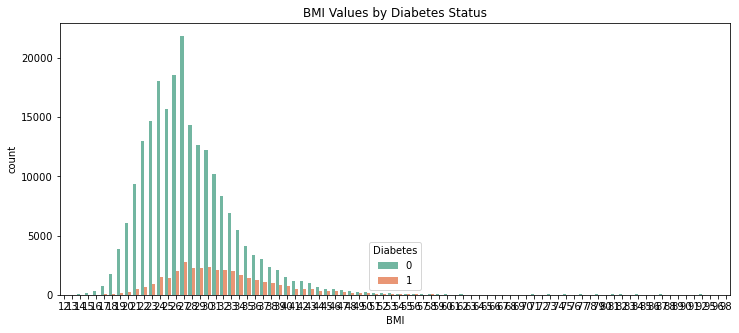

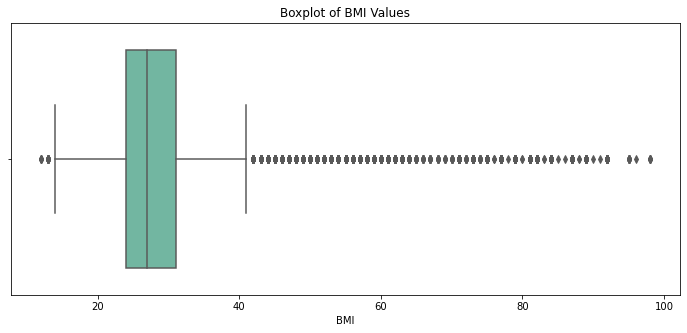

In [8]:
# Visualization of BMI by Diabetes Status
plt.figure(figsize=(12,5))
fig = sns.countplot(data=df, x='BMI', hue='Diabetes', palette='Set2', dodge=True)
fig.set_title('BMI Values by Diabetes Status')
plt.show()

# Boxplot of BMI by Diabetes Status
plt.figure(figsize=(12,5))
fig = sns.boxplot(data=df, x='BMI', hue='Diabetes', palette='Set2')
fig.set_title('Boxplot of BMI Values')
plt.show()

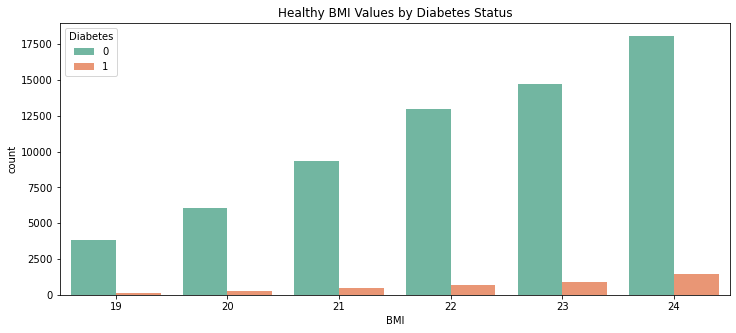

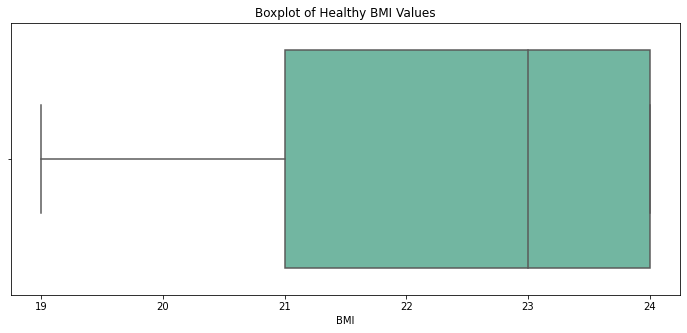

Original dataset size:	253,680 entries
Healthy dataset size:	68,953 entries
Loss: 184,727 (72.82%)


In [9]:
healthy_df = df.copy()
healthy_df = healthy_df[(healthy_df['BMI'] >= 18.5) & (healthy_df['BMI'] < 25)]

# Visualization of BMI by Diabetes Status
plt.figure(figsize=(12,5))
fig = sns.countplot(data=healthy_df, x='BMI', hue='Diabetes', palette='Set2', dodge=True)
fig.set_title('Healthy BMI Values by Diabetes Status')
plt.show()

# Boxplot of BMI by Diabetes Status
plt.figure(figsize=(12,5))
fig = sns.boxplot(data=healthy_df, x='BMI', hue='Diabetes', palette='Set2')
fig.set_title('Boxplot of Healthy BMI Values')
plt.show()



# Report dataset sizes and loss
original_count = df.shape[0]
new_count = healthy_df.shape[0]

print(f'Original dataset size:\t{original_count:,} entries')
print(f'Healthy dataset size:\t{new_count:,} entries')

print(f'Loss: {(original_count - new_count):,} ({((original_count - new_count) / original_count) * 100:.2f}%)')

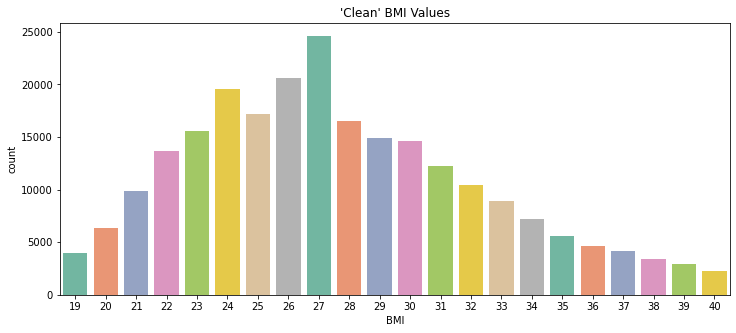

In [10]:
# Clean data by removing outliers
clean_df = df.copy()
# clean_df.loc[clean_df['BMI'] <= 18, 'BMI'] = 19
# clean_df.loc[clean_df['BMI'] > 40, 'BMI'] = 40
clean_df = clean_df[(clean_df['BMI'] > 18) & (clean_df['BMI'] <= 40)]

# Visualization of BMI by Diabetes Status
plt.figure(figsize=(12,5))
fig = sns.countplot(data=clean_df, x='BMI', palette='Set2', dodge=True)
fig.set_title('\'Clean\' BMI Values')
plt.show()

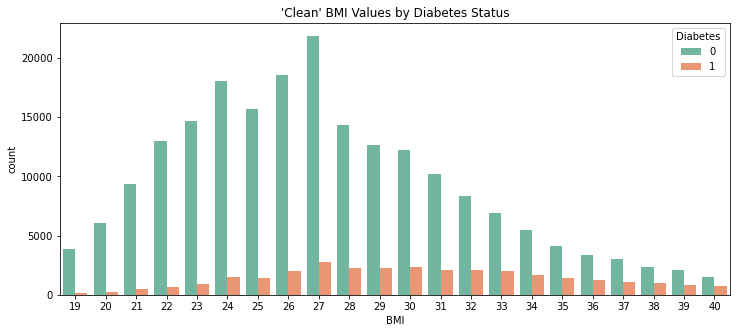

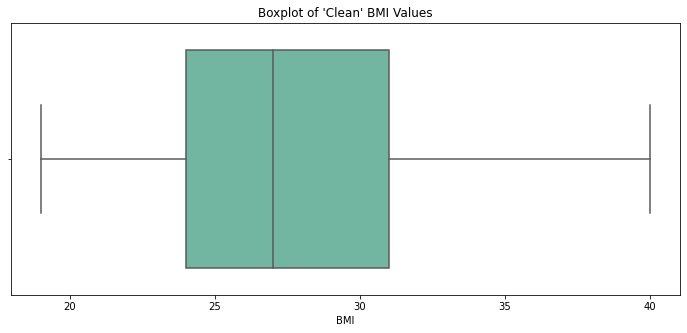

Original dataset size:	253,680 entries
Clean dataset size:	239,074 entries
Loss: 14,606 (5.76%)


In [11]:
# Clean data by removing outliers
clean_df = df.copy()
# clean_df.loc[clean_df['BMI'] < 18, 'BMI'] = 18
# clean_df.loc[clean_df['BMI'] > 40, 'BMI'] = 40
clean_df = clean_df[(clean_df['BMI'] > 18) & (clean_df['BMI'] <= 40)]

# Visualization of BMI by Diabetes Status
plt.figure(figsize=(12,5))
fig = sns.countplot(data=clean_df, x='BMI', hue='Diabetes', palette='Set2', dodge=True)
fig.set_title('\'Clean\' BMI Values by Diabetes Status')
plt.show()

# Boxplot of BMI by Diabetes Status
plt.figure(figsize=(12,5))
fig = sns.boxplot(data=clean_df, x='BMI', hue='Diabetes', palette='Set2')
fig.set_title('Boxplot of \'Clean\' BMI Values')
plt.show()

# Report dataset sizes and loss
original_count = df.shape[0]
new_count = clean_df.shape[0]

print(f'Original dataset size:\t{original_count:,} entries')
print(f'Clean dataset size:\t{new_count:,} entries')

print(f'Loss: {(original_count - new_count):,} ({((original_count - new_count) / original_count) * 100:.2f}%)')

### MACHINE LEARNING!

In [12]:
RANDOM_STATE = 42 # For reproducibility

In [13]:
# Split features / labels and scale
target_col = "Diabetes"

X = clean_df.drop(columns=[target_col])
y = clean_df[target_col].astype("int32")

# Train / test split
X_train, X_test, y_train, y_test = tts(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Scale features (important for neural nets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [14]:
# Build the neural network (Tensorflow)
# CNN expects 3D input: (batch, timesteps/features, channels)
# Here: one "channel" per feature vector
X_train_cnn = np.expand_dims(X_train_scaled, axis=-1)  # shape: (N, n_features, 1)
X_test_cnn  = np.expand_dims(X_test_scaled, axis=-1)
input_shape = X_train_cnn.shape[1:]                    # (n_features, 1)

model = models.Sequential([
    layers.Input(shape=input_shape),

    # First conv block
    layers.Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),

    # Second conv block
    layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling1D(),

    # Dense layers
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),

    # Output layer for binary classification
    layers.Dense(1, activation="sigmoid"),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]#, tf.keras.metrics.AUC(name="auc"), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [15]:
!nvidia-smi

Mon Dec  8 16:55:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.57                 Driver Version: 581.57         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Quadro P2000                 WDDM  |   00000000:65:00.0 Off |                  N/A |
| 51%   42C    P0             19W /   75W |     707MiB /   5120MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#### Notes

- <font color='red'> WARNING: Do not run the below if `!nvidia-smi` does not work</font> (Comment out `model` in the list or your PC/laptop will freeze and/or crash!)

- This was performed on an Intel Xeon W-2155 (20 cores) CPU with 64GB RAM and a Quadro RTX 4000 (8GB) GPU - your results may be different.

In [16]:
classifiers = [
    DT(max_depth=5, random_state=RANDOM_STATE),
    RF(max_depth=5, n_estimators=10, max_features=1, random_state=RANDOM_STATE, n_jobs=20),
    MLP(alpha=1, max_iter=1000, random_state=RANDOM_STATE),
    model, # if `!nvidia-smi` does not work comment out this line
    AdaBoostClassifier(algorithm="SAMME", random_state=RANDOM_STATE),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [17]:
def model_train(model):
    duration = 0 # Time taken in seconds
    
    if isinstance(m, models.Sequential): # Tensorflow model
        start = time.time()
        _ = model.fit(
            X_train_cnn, y_train,
            validation_split=0.2,
            epochs=10,
            batch_size=128,
            verbose=0
        )
        end = time.time()
        
        duration = end - start
    else:
        start = time.time()
        model.fit(X_train_scaled, y_train)
        end = time.time()

        
        duration = end - start
    
    return duration

def model_test(model):
    acc = 0.0
    duration = 0 # Time taken in seconds
    
    if isinstance(m, models.Sequential):
        start = time.time()
        test_loss, test_acc = model.evaluate(X_test_cnn, y_test, verbose=0)
        end = time.time()
        
        acc = test_acc
        duration = end - start
    else:
        start = time.time()
        acc = model.score(X_test_scaled, y_test)
        end = time.time()
        
        duration = end - start
    
    return acc, duration

for m in classifiers:
    print('Model:', type(m))
    train_tm = model_train(m)
    
    acc, score_tm = model_test(m)
    print(f'Acc: {acc * 100:.2f}%; train/test time:{train_tm:.2f}/{score_tm:.2f} seconds')

Model: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Acc: 86.91%; train/test time:0.35/0.01 seconds
Model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Acc: 86.91%; train/test time:0.15/0.02 seconds
Model: <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
Acc: 87.03%; train/test time:13.61/0.06 seconds
Model: <class 'keras.engine.sequential.Sequential'>
Acc: 87.22%; train/test time:179.21/8.56 seconds
Model: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Acc: 87.07%; train/test time:4.56/0.22 seconds
Model: <class 'sklearn.naive_bayes.GaussianNB'>
Acc: 77.91%; train/test time:0.07/0.03 seconds
Model: <class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>
Acc: 77.60%; train/test time:0.15/0.03 seconds


#### Useful Functions

In [ ]:
# # Useful functions for accessing remote files stored on Olympus
# from pandas import DataFrame
 
# def _blob_to_raw(url: str) -> str:
#     """
#     Convert an Olympus/Git-like 'blob' URL to the corresponding
#     'raw/<repo_path>/refs/heads/<branch>/...' URL.
 
#     Example:
#       'https://.../blob/main/path/to/file.csv'
#     -> 'https://.../raw/<repo_path>/refs/heads/main/path/to/file.csv'
#     """
#     from urllib.parse import urlsplit, urlunsplit
 
#     parts = urlsplit(url)
#     path = parts.path
 
#     # already raw in the desired form
#     if path.startswith('/raw/'):
#         return url
#     if '/blob/' not in path:
#         return url
 
#     before, _, after = path.partition('/blob/')
#     new_path = '/raw' + before + '/refs/heads/' + after.lstrip('/')
#     return urlunsplit((parts.scheme, parts.netloc, new_path, parts.query, parts.fragment))
 
# def load_olympus_data(url: str) -> DataFrame:
#     '''
#     Load data from a password-protected URL into a pandas DataFrame by prompting the user for their NTU username and password for authentication.
 
#     Parameters:
#     url (str): The URL of the CSV file to load.
 
#     Returns:
#     DataFrame: A pandas DataFrame containing the loaded data.
#     '''
#     import requests, io, getpass, pandas as pd
 
#     username = input('NTU username: ')
#     password = getpass.getpass('NTU password: ')
 
#     response = requests.get((_blob_to_raw(url)), auth=(username, password))
#     response.raise_for_status()
 
#     return pd.read_csv(io.StringIO(response.text))

### Image Classification
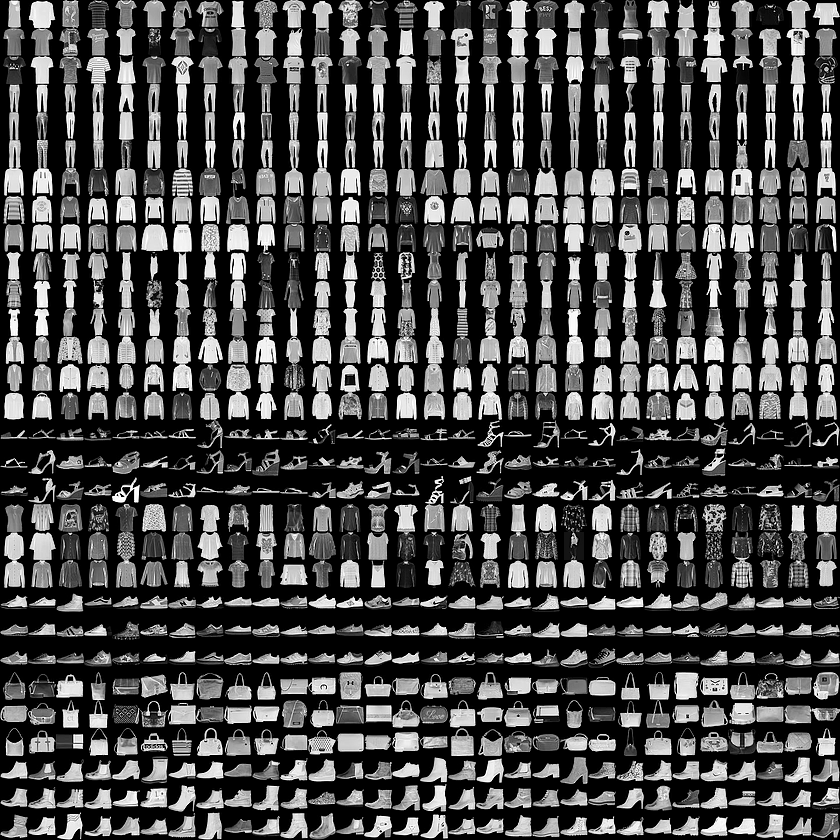

(by Zalando, MIT License)

In [ ]:
# The following is from tensorflow examples: https://www.tensorflow.org/tutorials/keras/classification
# Copyright (c) 2017 François Chollet
# MIT License

In [ ]:
# Setup required libraries
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt

# Get the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Set class names for the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalize the images to a range of 0 to 1 (black/white images)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Verify the data by plotting the first 25 images from the training set and display the class name below each image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Exercise (Lab Work or Home Work as your convenience): 

**Consider the DataSet of your Coursework**

Create visualisations using your coursework. Select the type of visualisation that best represents your data and highlights the insights you want to convey. Start with common visualisation types, and as you progress, experiment with more advanced or less common types to showcase your expertise. Try to create GUIs considering the previous visualisations.